## A Novel Method for Handwritten Digit Recognition System

## Project Development Phase

## Project ID: PNT2022TMID15811

## Sprint 1

### Load Required Librairies and dataset loading

In [1]:
#Load Required Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#Loading MNIST DATA
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Corresponding output:  5


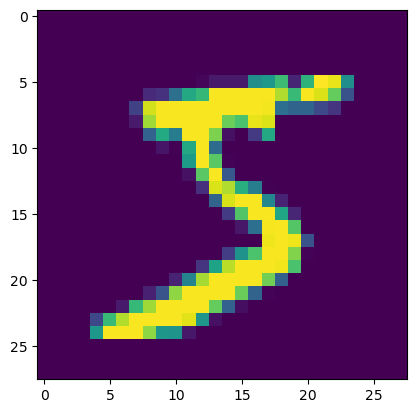

In [5]:
plt.imshow(X_train[0])
print("Corresponding output: ",y_train[0])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

## Sprint 2

### Scaling and transforming y in one hot encoding form

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
# transforming y in one hot encoding form
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
X_train=X_train.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28,1)

## Sprint 3

### Model Building

In [11]:
# MODEL BUILDING

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [14]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [15]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/250
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1386 - accuracy: 0.9589 - val_loss: 0.0544 - val_accuracy: 0.9822
Epoch 2/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0490 - val_accuracy: 0.9848
Epoch 3/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0410 - val_accuracy: 0.9859
Epoch 4/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0460 - val_accuracy: 0.9861
Epoch 5/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0514 - val_accuracy: 0.9849
Epoch 6/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0361 - val_accuracy: 0.9891
Epoch 7/250
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0543 -

In [16]:
loss_df=pd.DataFrame(model.history.history)

In [17]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.138569,0.958900,0.054441,0.9822
1,0.047774,0.985267,0.048956,0.9848
2,0.030413,0.990217,0.040957,0.9859
3,0.020105,0.993333,0.045989,0.9861
4,0.013756,0.995650,0.051445,0.9849
5,0.010046,0.996683,0.036128,0.9891
6,0.008611,0.997267,0.054277,0.9853
7,0.006493,0.997850,0.046139,0.9900
8,0.005139,0.998317,0.058176,0.9852
9,0.005362,0.998133,0.047975,0.9885


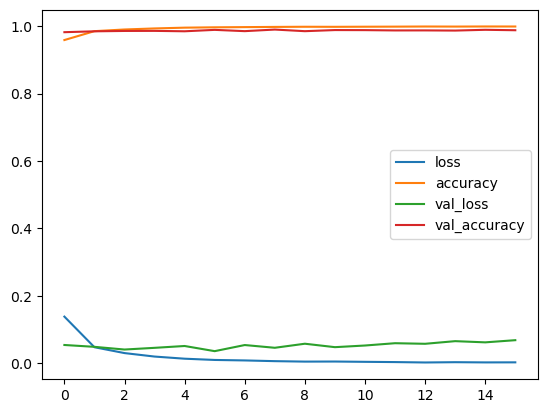

In [22]:
plt.plot(loss_df,label=loss_df.columns);
plt.legend();